# Unsupervised Learning Algorithm

In [1]:
import warnings
warnings.filterwarnings('ignore')

> ## Import Packages

In [2]:
import numpy as np
import pandas as pd

# I. Load Datasets

> ## 1) MNIST Dataset

In [3]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

In [5]:
X_train.shape, X_test.shape 

((60000, 784), (10000, 784))

> ## 2) 'mnist_32.csv' Data

* AutoEncoder 'Latent Space' Data

In [6]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/mnist_32.csv'
mnist_32 = pd.read_csv(url)

mnist_32.shape

(10000, 32)

In [7]:
mnist_32.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,3.688405,3.930005,9.707697,11.878195,8.254636,5.676317,17.008430,5.514244,-0.829364,7.013071,...,-0.934536,6.870015,12.158235,13.716932,8.344388,13.778448,-0.989779,-0.983739,4.144263,12.360807
1,8.770631,13.023509,8.275418,10.167507,4.191549,8.799183,7.692517,14.583757,-0.964878,9.153512,...,-0.628069,16.332850,14.312974,10.023836,8.879703,4.838847,-0.999356,-0.976225,6.888207,5.912664
2,3.612655,4.127336,6.994210,11.199030,4.834584,2.894823,7.723920,3.293408,0.018939,2.376893,...,-0.839960,8.922295,3.176869,3.251928,10.095084,2.780117,-0.962890,-0.873302,4.892313,3.869293
3,4.778088,11.318460,19.590998,9.894455,8.185436,5.662807,9.577927,10.103026,-0.990062,15.396132,...,-0.950087,7.890187,9.783769,11.231997,4.084829,17.978115,-0.999962,-0.998608,9.772373,9.696581
4,4.581480,6.314673,9.630608,5.819597,4.213900,6.164255,1.878163,4.087563,-0.712614,15.693965,...,-0.781293,4.067109,4.883681,11.075063,8.700143,14.223484,-0.990151,-0.995499,8.750870,12.275040


# II. K-means Clustering

> ## 1) Modeling - sklearn.cluster

In [8]:
from sklearn.cluster import KMeans

Clusters = KMeans(n_clusters = 10,
                  n_init = 10,
                  random_state = 2045)

Clusters.fit(mnist_32)

KMeans(n_clusters=10, random_state=2045)

> ## 2) Visualization

* Clusters.labels_ : 0부터 9까지 10개의 군집 정보
 - 각 군집에 속한 이미지 시각화
 - 'X_test' Data 사용

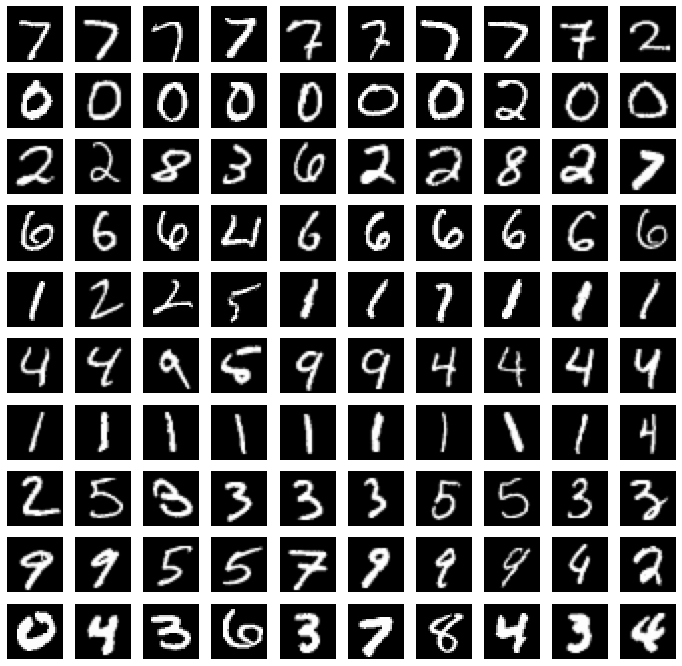

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 12))

for i in range(10):
    images = X_test[Clusters.labels_ == i]
    for n in range(10):
        plt.subplot(10, 10, i*10 + n + 1)
        plt.imshow(images[n].reshape(28, 28), cmap = 'gray')
        plt.axis('off')
        
plt.show()

# III. t-SNE(Stochastic Neighbor Embedding)

* 각 데이터의 유사도를 확률적(Stochastic)으로 표현
* 하나의 데이터로부터 다른 데이터에 대한 거리를 't-분포'의 확률로 치환
 - 가까운 거리의 데이터는 높은 확률값
 - 먼 거리의 데이터는 확률값이 낮음
 - https://bcho.tistory.com/1210
* 고차원과 저차원에서 확률값을 계산 후, 저차원 확률값이 고차원에 가까워지도록 학습
* 연산에 많은 시간이 걸리기 때문에 50차원 이하의 데이터 사용을 권장
 - 32차원의 'mnist_32.csv' Data

> ## 1) Modeling - sklearn.manifold

* 약 2분
<br>
<br>
* n_components : 축소 차원 공간
* learning_rate : 학습률(10 ~ 1000)
* perplexity : 고려할 최근접 이웃의 숫자(5 ~ 50)

In [10]:
%%time

from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, 
            learning_rate = 100, 
            perplexity = 15, 
            random_state = 2045)

tsne_vector = tsne.fit_transform(mnist_32)

CPU times: user 2min 12s, sys: 1.95 s, total: 2min 14s
Wall time: 1min 17s


* 2차원 정보로 축소

In [11]:
tsne_vector.shape

(10000, 2)

> ## 2) Visualization

* tsne_vector : 2차원 축소 정보
 - Label 별로 잘 뭉쳐있는 것을 확인
 - 'y_test' Data 사용

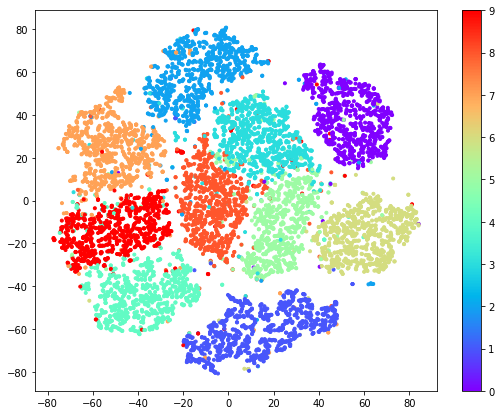

In [12]:
plt.figure(figsize = (9, 7))

fig = plt.scatter(tsne_vector[:, 0], 
                  tsne_vector[:, 1], 
                  marker = '.', 
                  c = y_test, 
                  cmap = 'rainbow')
cb = plt.colorbar(fig, ticks = range(10))

plt.show()

* 'y_test' 정보와 비교

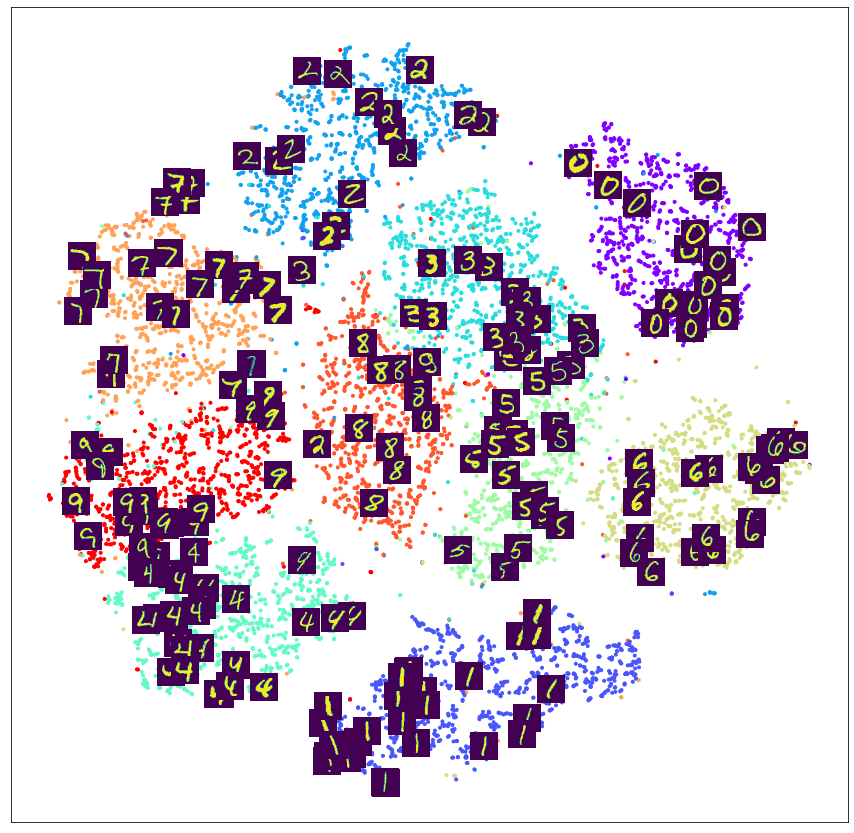

In [13]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

plt.figure(figsize = (15, 15))

ax = plt.subplot(1, 1, 1)
ax.scatter(tsne_vector[:, 0], 
           tsne_vector[:, 1], 
           marker = '.', 
           c = y_test, 
           cmap = 'rainbow')

for i in range(200):
    imagebox = OffsetImage(X_test[i].reshape(28, 28))
    ab = AnnotationBbox(imagebox, 
                        (tsne_vector[i, 0], tsne_vector[i, 1]), 
                        frameon = False, 
                        pad = 0.0)
    ax.add_artist(ab)

ax.set_xticks([])
ax.set_yticks([])

plt.show()

> ## 3) 'perplexity'별 결과 비교

* 약 11분
<br>
<br>
* perplexity : 고려할 최근접 이웃의 숫자(5 ~ 50)
 - 'perplexity' 변화에 따른 군집형태 확인
 - 'y_test' Data 사용

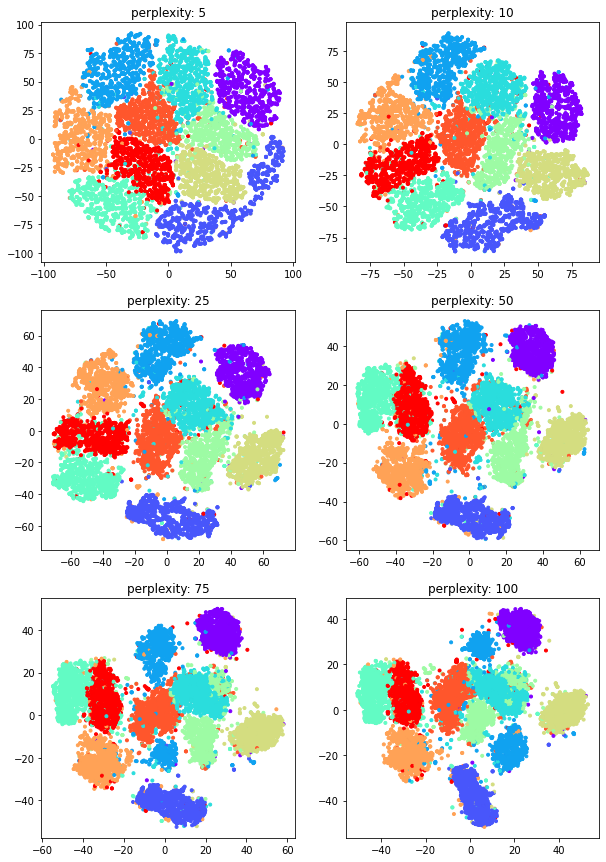

CPU times: user 16min 18s, sys: 5.58 s, total: 16min 23s
Wall time: 8min 54s


In [14]:
%%time

perplexities = [5, 10, 25, 50, 75, 100]

plt.figure(figsize = (10, 15))

for i in range(6):
    tsne = TSNE(n_components = 2, 
                learning_rate = 100, 
                perplexity = perplexities[i], 
                random_state = 2045)
    
    tsne_vector = tsne.fit_transform(mnist_32)

    plt.subplot(3, 2, i + 1)
    plt.scatter(tsne_vector[:, 0], 
                tsne_vector[:, 1], 
                marker = '.', 
                c = y_test, 
                cmap = 'rainbow')
    plt.title('perplexity: {0}'.format(perplexities[i]))

plt.show()

# 
# 
# 
# The End
# 
# 
# 